In [1]:
import numpy as np
import cv2

'''
K-MEANS알고리즘은 데이터의 거리에 따라 군집화를 해주는 알고리즘 인데, 앞서 HSV로 색상을 변경하여 군집하하기 때문에
색상을 통해서 군집화가 되는 것을 확인할 수가 있다. 색상을 통해 군집화를 진행하므로 사진에서 나타나는 색상을 직접 확인해봤을때
과일들의 색상이 대략 4가지 정도로 나타나는 것을 경험적으로 알 수 있다. 그것을 극대화시키기 위해 침식, 팽창 연산을 이용하여
전처리 해준다면 K=4로만 주어도 비슷한 색상끼리 군집화가  되는 것을 알 수 있다. 그러나 침식, 팽창 연산을 하지 않은 원본
연상으로 할 때는 K의 값이 너무 작으면 색상 별 군집화가  모호해지고, K값이 너무 클 경우 같은 과일의 색일 지라도, 너무 세분화
되거나 노이즈의 생상이 따로 군집화 되어 낭비되는 군집이 생기므로 8~10정도의 K가 가장 좋다.
중심점의 경우 처음 어떻게 잡더라도 결국 반복 연산으로 군집의 평균을 찾아가므로  PP와 RANDOM 모두 비슷한 결과를 나타내고 있다.
'''

def draw_rect(src , colors , K):
    
    new = 255 - np.zeros(src.shape,dtype = src.dtype)
    new = new[0:int(src.shape[1]/K) , 0:int(src.shape[0])]
    
    start = (0,0)
    for i in range(len(colors)+1) :
        end = (i*int(src.shape[0]/K),int(src.shape[1]/K))
        cv2.rectangle(new,start,end,colors[i-1],-1)
        start = (end[0],0)
        
    return new

def preprocessing(src):
    
    kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize = (3,3))
    src = cv2.erode(src ,kernel,iterations = 4)
    src = cv2.dilate(src ,kernel,iterations = 4)
    src_hsv = cv2.cvtColor(src , cv2.COLOR_BGR2HSV)
    src_hsv = src_hsv.reshape((-1,3)).astype(np.float32)
    cv2.imshow('src',src)
    
    return src_hsv

def k_means(K,src_hsv):
    term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, labels, centers = cv2.kmeans(src_hsv, K, None, term_crit, 5,
                                      cv2.KMEANS_RANDOM_CENTERS)
    
    labels2 = np.uint8(labels.reshape(src.shape[:2]))
    dst  = np.zeros(src.shape, dtype=src.dtype)
    
    colors = []
    
    for i in range(K): 
        r = np.random.randint(256)
        g = np.random.randint(256)
        b = np.random.randint(256)
        dst[labels2 == i] = [b, g, r]
        colors.append((b,g,r))
    return colors , dst
    
while True :
    origin = cv2.imread('data/fruits.jpg')
    src = origin.copy()
    src2 = origin.copy()
    src_hsv = preprocessing(src)
    src_hsv2 = cv2.cvtColor(src , cv2.COLOR_BGR2HSV)
    src_hsv2 = src_hsv2.reshape((-1,3)).astype(np.float32)
    
    K = 4
    K2 = 9
    #print(colors)
    colors , dst = k_means(K,src_hsv)
    colors2 , dst2 = k_means(K2, src_hsv2)
    new = draw_rect(src,colors,K)
    new2 = draw_rect(src2,colors2,K2)
    
    text = 'Press space bar'
    cv2.putText(dst,text,(105,35),cv2.FONT_HERSHEY_SIMPLEX,1 ,(255,255,255),3)
    
    cv2.imshow('new',new)
    cv2.imshow('new2',new2)
    cv2.imshow('orgin',origin)
    cv2.imshow('dst',dst)
    cv2.imshow('dst2',dst2)
    
    key = cv2.waitKey()
    if key == 27 :
        break

cv2.destroyAllWindows()



In [12]:
src=cv2.imread('data/fruits.jpg')
kernel = cv2.getStructuringElement(shape = cv2.MORPH_RECT, ksize = (3,3))
src = cv2.erode(src ,kernel,iterations = 4)
src = cv2.dilate(src ,kernel,iterations = 4)
src_hsv = cv2.cvtColor(src , cv2.COLOR_BGR2HSV)
src_hsv = src_hsv.reshape((-1,3)).astype(np.float32)
cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
# 1001.py
import cv2
import numpy as np
#1
cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
              int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

acc_gray= np.zeros(shape=(height, width), dtype=np.float32)
acc_bgr = np.zeros(shape=(height, width, 3), dtype=np.float32)
t = 0

#2
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t += 1
    print('t =', t)   
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.accumulate(gray, acc_gray)
    avg_gray = acc_gray/t       
    dst_gray = cv2.convertScaleAbs(avg_gray)

    cv2.accumulate(frame, acc_bgr)
    avg_bgr = acc_bgr/t       
    dst_bgr= cv2.convertScaleAbs(avg_bgr)
    
    cv2.imshow('frame',frame)
    cv2.imshow('dst_gray',dst_gray)
    cv2.imshow('dst_bgr',dst_bgr)    
    key = cv2.waitKey(20)
    if key == 27:
        break
#3
if cap.isOpened(): cap.release();
cv2.imwrite('./data/avg_gray.png', dst_gray)
cv2.imwrite('./data/avg_bgr.png', dst_bgr)
cv2.destroyAllWindows()


t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17
t = 18
t = 19
t = 20
t = 21
t = 22
t = 23
t = 24
t = 25
t = 26
t = 27
t = 28
t = 29
t = 30
t = 31
t = 32
t = 33
t = 34
t = 35
t = 36
t = 37
t = 38
t = 39
t = 40
t = 41
t = 42
t = 43
t = 44
t = 45
t = 46
t = 47
t = 48
t = 49
t = 50
t = 51
t = 52
t = 53
t = 54
t = 55
t = 56
t = 57
t = 58
t = 59
t = 60
t = 61
t = 62
t = 63
t = 64
t = 65
t = 66
t = 67
t = 68
t = 69
t = 70
t = 71
t = 72
t = 73
t = 74
t = 75
t = 76
t = 77
t = 78
t = 79
t = 80
t = 81
t = 82
t = 83
t = 84
t = 85
t = 86
t = 87
t = 88
t = 89
t = 90
t = 91
t = 92
t = 93
t = 94
t = 95
t = 96
t = 97
t = 98
t = 99
t = 100
t = 101
t = 102
t = 103
t = 104
t = 105
t = 106
t = 107
t = 108
t = 109
t = 110
t = 111
t = 112
t = 113
t = 114
t = 115
t = 116
t = 117
t = 118
t = 119
t = 120
t = 121
t = 122
t = 123
t = 124
t = 125
t = 126
t = 127
t = 128
t = 129
t = 130
t = 131
t = 132
t = 133
t = 134
t = 135
t = 136
t = 137
t = 138
t = 

In [19]:
# 1002.py
import cv2
import numpy as np

#1
cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
              int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

TH      = 40  # binary threshold
AREA_TH = 80 # area   threshold 
bkg_gray= cv2.imread('./data/avg_gray.png', cv2.IMREAD_GRAYSCALE)
bkg_bgr = cv2.imread('./data/avg_bgr.png')

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE

#2
t = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t+=1
    print('t =', t)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#2-1 
    diff_gray  = cv2.absdiff(gray, bkg_gray)
##    ret, bImage= cv2.threshold(diff_gray,TH,255,cv2.THRESH_BINARY)
    
#2-2      
    diff_bgr = cv2.absdiff(frame, bkg_bgr)      
    db, dg, dr = cv2.split(diff_bgr)
    ret, bb = cv2.threshold(db,TH,255,cv2.THRESH_BINARY)
    ret, bg = cv2.threshold(dg,TH,255,cv2.THRESH_BINARY)
    ret, br = cv2.threshold(dr,TH,255,cv2.THRESH_BINARY)
 
    bImage = cv2.bitwise_or(bb, bg)
    bImage = cv2.bitwise_or(br, bImage)
      
    bImage = cv2.erode(bImage, None, 5)
    bImage = cv2.dilate(bImage,None, 5)    
    bImage = cv2.erode(bImage, None, 7)

#2-3     
    image, contours, hierarchy = cv2.findContours(bImage, mode, method)
    cv2.drawContours(frame, contours, -1, (255,0,0), 1)   
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > AREA_TH:
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0,0,255), 2)
    
    cv2.imshow('frame',frame)
    cv2.imshow('bImage',bImage)
    cv2.imshow('diff_gray',diff_gray)
    cv2.imshow('diff_bgr',diff_bgr)
    key = cv2.waitKey(25)
    if key == 27:
        break
#3
if cap.isOpened():
    cap.release();
cv2.destroyAllWindows()


t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17
t = 18
t = 19
t = 20
t = 21
t = 22
t = 23
t = 24
t = 25
t = 26
t = 27
t = 28
t = 29
t = 30
t = 31
t = 32
t = 33
t = 34
t = 35
t = 36
t = 37
t = 38
t = 39
t = 40
t = 41
t = 42
t = 43
t = 44
t = 45
t = 46
t = 47
t = 48
t = 49
t = 50
t = 51
t = 52
t = 53
t = 54
t = 55
t = 56
t = 57
t = 58
t = 59
t = 60
t = 61
t = 62
t = 63
t = 64
t = 65
t = 66
t = 67
t = 68
t = 69
t = 70
t = 71
t = 72
t = 73
t = 74
t = 75
t = 76
t = 77
t = 78
t = 79
t = 80
t = 81
t = 82
t = 83
t = 84
t = 85
t = 86
t = 87
t = 88
t = 89
t = 90
t = 91
t = 92
t = 93
t = 94
t = 95
t = 96
t = 97
t = 98
t = 99
t = 100
t = 101
t = 102
t = 103
t = 104
t = 105
t = 106
t = 107
t = 108
t = 109
t = 110
t = 111
t = 112
t = 113
t = 114
t = 115
t = 116
t = 117
t = 118
t = 119
t = 120
t = 121
t = 122
t = 123
t = 124
t = 125
t = 126
t = 127
t = 128
t = 129
t = 130
t = 131
t = 132
t = 133
t = 134
t = 135
t = 136
t = 137
t = 138
t = 

In [20]:
# 1003.py
import cv2
import numpy as np

#1
cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                 int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

TH      = 40  # binary threshold
AREA_TH = 80 # area   threshold 
acc_bgr = np.zeros(shape=(height, width, 3), dtype=np.float32)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE

#2
t = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t+=1
    print("t = ", t)
    blur = cv2.GaussianBlur(frame,(5,5),0.0)
#2-1
    if t < 50:
        cv2.accumulate(blur, acc_bgr)
        continue
    elif t == 50:
        bkg_bgr = acc_bgr/t
#2-2: t >= 50
##    diff_bgr = cv2.absdiff(np.float32(blur), bkg_bgr).astype(np.uint8)
    diff_bgr = np.uint8(cv2.absdiff(np.float32(blur), bkg_bgr))
    db,dg,dr = cv2.split(diff_bgr)
    ret, bb = cv2.threshold(db,TH,255,cv2.THRESH_BINARY)
    ret, bg = cv2.threshold(dg,TH,255,cv2.THRESH_BINARY)
    ret, br = cv2.threshold(dr,TH,255,cv2.THRESH_BINARY)
    bImage = cv2.bitwise_or(bb, bg)
    bImage = cv2.bitwise_or(br, bImage)
    bImage = cv2.erode(bImage,None, 5)
    bImage = cv2.dilate(bImage,None,5)    
    bImage = cv2.erode(bImage,None, 7)
    cv2.imshow('bImage',bImage)
    msk = bImage.copy()
    image, contours, hierarchy = cv2.findContours(bImage, mode, method)
    cv2.drawContours(frame, contours, -1, (255,0,0), 1)   
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > AREA_TH:
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0,0,255), 2)
            cv2.rectangle(msk, (x, y), (x+width, y+height), 255, -1) 
#2-3
    msk = cv2.bitwise_not(msk)
    cv2.accumulateWeighted(blur,bkg_bgr, alpha=0.1,mask=msk)

    cv2.imshow('frame',frame)
    cv2.imshow('bkg_bgr',np.uint8(bkg_bgr))    
    cv2.imshow('diff_bgr',diff_bgr)
    key = cv2.waitKey(25)
    if key == 27:
        break
#3
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()


t =  1
t =  2
t =  3
t =  4
t =  5
t =  6
t =  7
t =  8
t =  9
t =  10
t =  11
t =  12
t =  13
t =  14
t =  15
t =  16
t =  17
t =  18
t =  19
t =  20
t =  21
t =  22
t =  23
t =  24
t =  25
t =  26
t =  27
t =  28
t =  29
t =  30
t =  31
t =  32
t =  33
t =  34
t =  35
t =  36
t =  37
t =  38
t =  39
t =  40
t =  41
t =  42
t =  43
t =  44
t =  45
t =  46
t =  47
t =  48
t =  49
t =  50
t =  51
t =  52
t =  53
t =  54
t =  55
t =  56
t =  57
t =  58
t =  59
t =  60
t =  61
t =  62
t =  63
t =  64
t =  65
t =  66
t =  67
t =  68
t =  69
t =  70
t =  71
t =  72
t =  73
t =  74
t =  75
t =  76
t =  77
t =  78
t =  79
t =  80
t =  81
t =  82
t =  83
t =  84
t =  85
t =  86
t =  87
t =  88
t =  89
t =  90
t =  91
t =  92
t =  93
t =  94
t =  95
t =  96
t =  97
t =  98
t =  99
t =  100
t =  101
t =  102
t =  103
t =  104
t =  105
t =  106
t =  107
t =  108
t =  109
t =  110
t =  111
t =  112
t =  113
t =  114
t =  115
t =  116
t =  117
t =  118
t =  119
t =  120
t =  121
t =  122
t =  123
t

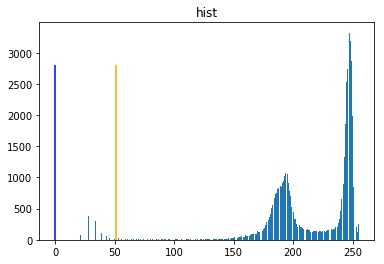

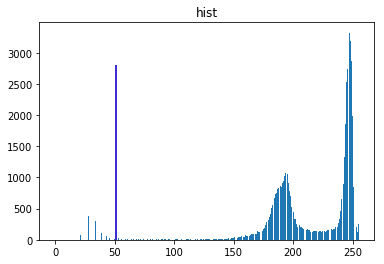

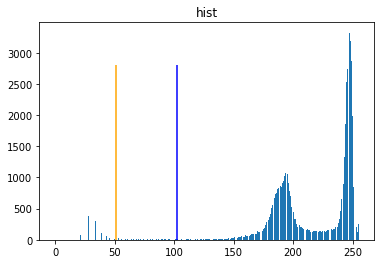

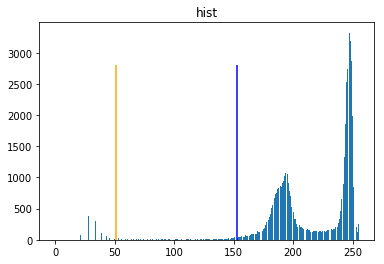

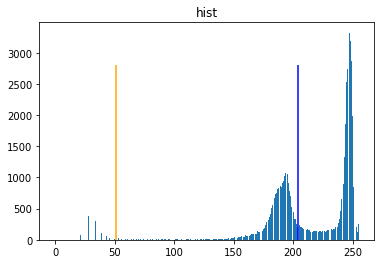

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def onChange(pos):
    global img,img1,img2
    thres1=cv2.getTrackbarPos('Thres1','img')
    thres2=cv2.getTrackbarPos('Thres2','img')
    ret1,img1=cv2.threshold(img,thres1,255,cv2.THRESH_BINARY)
    ret2,img2=cv2.threshold(img,thres2,255,cv2.THRESH_BINARY_INV)
    img2=cv2.bitwise_and(img1,img2)
    img2=cv2.bitwise_not(img2)
    cv2.imshow('img',img2)
    plt.cla()
    plt.bar(binX,hist)
    plt.title('hist')
    plt.vlines(ret1,0,2800,colors='orange')
    plt.vlines(ret2,0,2800,colors='blue')
    plt.show()
img=cv2.imread('./data/cell.png',0)
img1=img.copy()
img2=img.copy()
hist=cv2.calcHist(images=[img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist=hist.reshape(-1)
binX=np.arange(256)
cv2.imshow('img',img)
cv2.createTrackbar('Thres1','img',0,255,onChange)
cv2.createTrackbar('Thres2','img',0,255,onChange)
cv2.waitKey()
cv2.destroyAllWindows()
    

In [28]:
cv2.threshold?